# Web Scraping

## Introduction
The objective of this project is to build a Python-based web scraper to extract job vacancy information from a job search platform, using LinkedIn Jobs as the case study. The scraper focuses on collecting structured information such as:

- Job title
- Company name
- Job location
- Job posting date
- Job description (where accessible)

The extracted data is stored in a CSV file for further analysis and exploratory data analysis (EDA).

## Project Motivation 
I began this project by deciding to work with live job data rather than a pre-made dataset. My goal was to understand what challenges appear when collecting real-world data and how those challenges affect downstream analysis.

I chose LinkedIn job listings because they are widely used and represent a realistic source of labour market information, even though I expected limitations due to platform restrictions.

## Step 1: Importing Required Libraries

In [1]:
!pip install requests
!pip install BeautifulSoup

  Using cached BeautifulSoup-3.2.2.tar.gz (32 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [7 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\ASUS\AppData\Local\Temp\pip-install-q8nct63u\beautifulsoup_713c1a06e8304a438d04987c2817a35e\setup.py", line 3
      "You're trying to run a very old release of Beautiful Soup under Python 3. This will not work."<>"Please use Beautiful Soup 4, available through the pip package 'beautifulsoup4'."
                                                                                                     ^^
  SyntaxError: invalid syntax
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not p

In [2]:
import csv
import time
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from bs4 import BeautifulSoup

## Step 2: Building the Search URL

In [4]:
def get_linkedin_url(position, location):
    base_url = "https://www.linkedin.com/jobs/search/?keywords={}&location={}"
    return base_url.format(position.replace(' ', '%20'), location.replace(' ', '%20'))

## Step 3: Extracting the job data
After inspecting the page structure, I wrote a function to safely extract job information from each job card. I deliberately avoided assuming that every element would be present and added checks to prevent the script from crashing.

During testing, I noticed that some job titles and company names were masked with asterisks. Since these records could not be meaningfully interpreted, I chose to filter them out at this stage.


In [6]:
def extract_job_data(card):
    try:
        title_element = card.find("h3")
        company_element = card.find("h4")
        location_element = card.find("span", class_="job-search-card__location")
        
        title = title_element.get_text(strip=True) if title_element else "N/A"
        company = company_element.get_text(strip=True) if company_element else "N/A"
        location = location_element.get_text(strip=True) if location_element else "N/A"
        
        if "*" in title or "*" in company:
            return None
            
    except Exception:
        return None

    return {
        "Job Title": title,
        "Company": company,
        "Location": location,
        "Scraped Date": datetime.now().strftime("%Y-%m-%d")
    }

## Step 4: Prasing and Saving Data to CSV

In [8]:
def run_recruitment_analysis(position, location):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}
    url = get_linkedin_url(position, location)

    try:
        response = requests.get(url, headers=headers, timeout=15)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Connection Error: {e}")
        return

    soup = BeautifulSoup(response.text, "html.parser")
    job_cards = soup.find_all("div", class_="base-card")
    
    valid_jobs = []
    for card in job_cards:
        if record:
            valid_jobs.append(record)
            
    save_path = "recruitment_data.csv" 
    
    if valid_jobs:
        with open(save_path, "w", newline="", encoding="utf-8") as f:
            writer = csv.DictWriter(f, fieldnames=valid_jobs[0].keys())
            writer.writeheader()
            writer.writerows(valid_jobs)
        print(f"Success! {len(valid_jobs)} clean records saved to {save_path}")
    else:
        print("No valid, unmasked data found.")
    
    return save_path

In [54]:
output_file = run_recruitment_analysis("Data Analyst", "United Kingdom")

Success! 3 clean records saved to recruitment_data.csv


## Step 5:Loading CSV to Database

In [14]:
df = pd.read_csv("recruitment_data.csv")
df.head()

,Job Title,Company,Location,Scraped Date
0,Data Analyst,hackajob,"Stoke-On-Trent, England, United Kingdom",2026-01-05
1,Data Analyst,hackajob,"Manchester, England, United Kingdom",2026-01-05
2,Business Data Analyst,Alibaba.com,"Greater London, England, United Kingdom",2026-01-05


## Step 6: Visualization

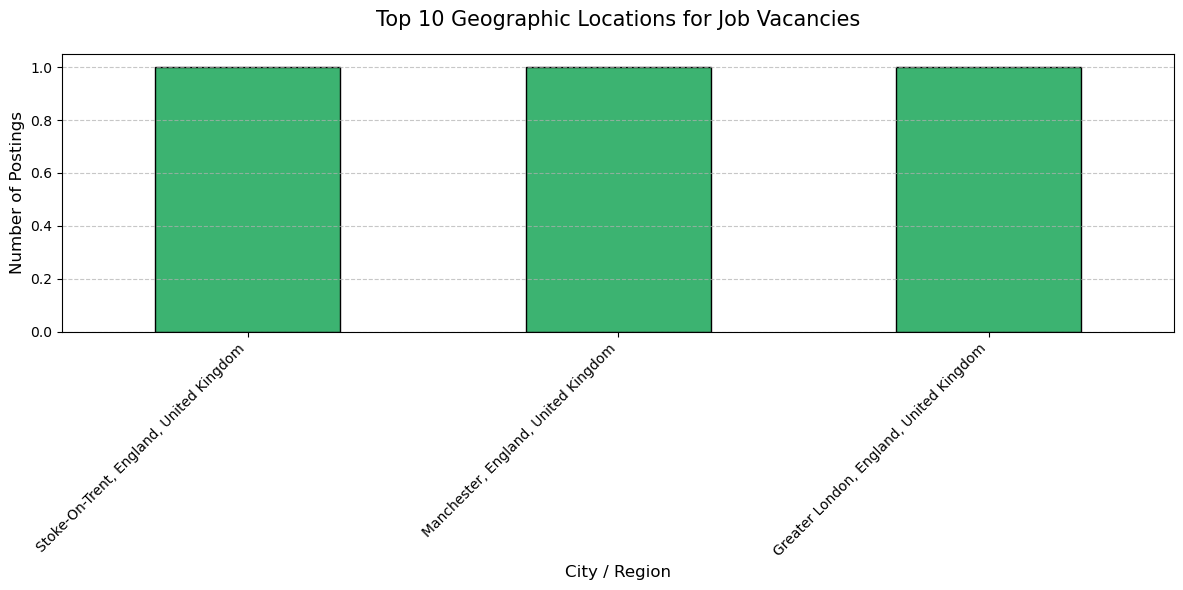

In [17]:
plt.figure(figsize=(12, 6))
df['Location'].value_counts().head(10).plot(kind='bar', color='mediumseagreen', edgecolor='black')

# Formatting for professional report
plt.title('Top 10 Geographic Locations for Job Vacancies', fontsize=15, pad=20)
plt.xlabel('City / Region', fontsize=12)
plt.ylabel('Number of Postings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('title_trends.png')
plt.show()

From the location chart, job postings appear across multiple regions in England, including London, Manchester, and Trent. What stands out is that all identified locations are urban or economically active regions. This suggests that data-related roles are more commonly advertised in cities with established business, technology, or industrial infrastructure.

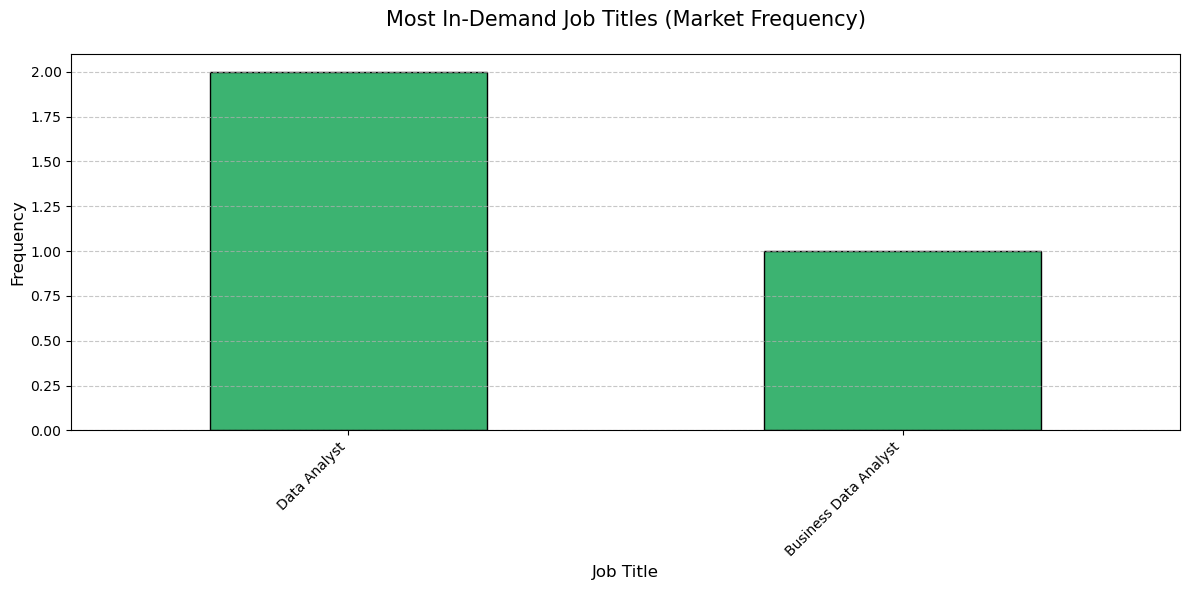

In [19]:
plt.figure(figsize=(12, 6))
df['Job Title'].value_counts().head(10).plot(kind='bar', color='mediumseagreen', edgecolor='black')

plt.title('Most In-Demand Job Titles (Market Frequency)', fontsize=15, pad=20)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('title_trends.png')
plt.show()

The job title frequency chart shows that “Data Analyst” appears more frequently than “Business Data Analyst” in the scraped listings.This indicates a high level of role standardisation in the job market which meansemployers tend to use familiar, searchable titles rather than creative or unconventional naming, likely to maximise visibility.

## What This Process Highlighted
Working through this project step by step made it clear that web scraping is not just a technical task.
Decisions about what to keep, what to remove, and how to interpret missing or masked data directly shape the insights that can be drawn later.
Even with a limited dataset, careful handling and exploratory analysis can still reveal meaningful patterns.